## Initialization
We'll start off by importing the necessary libraries and modules. Unique to this notebook will be a separate notebook containing any
functions required for this project.

In [1]:
# Importing the standard libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Importing the file containing our unique functions
"""
vals_by_col
date_to_col
secondary_unique
counts_to_portions
expand_categories
"""
# pip install ipynb
from ipynb.fs.full.blog_post_functions import *

## Load Data and Perform Initial Inspection
We gathered our data from https://data.seattle.gov/Public-Safety/Call-Data/33kz-ixgy, which provided a dataset named "Call Data" containing data on emergency calls to the Seattle Police Department call center.

The dataset itself is just over 5 million rows, and very much so over GitHub's size limitation. The dataset we will be performing our analysis on is a subset containing 10,000 rows of data.

In [ ]:
"""
DO NOT RUN!

This cell will not run, it is only included to show how we obtained our subset.
"""

df = pd.read_csv('Call_Data.csv')

np.random.seed(0)
df_sample = np.random.choice(df.shape[0], 10000, replace = False)
df_subset = df.loc[df_sample]

df_subset.to_csv('Call_Data_Subset.csv')

In [3]:
# Loading the Data (pretending we're starting with the 10,000 row dataset)
df = pd.read_csv('Call_Data_Subset.csv')

## Initial Inspection
1. Check data types, and how it is all formatted.
2. Check for missing values, and amount of missing values.
3. Look for anything unique. Is there anything we haven't encountered before?

In [7]:
# Overall shape
df.shape

(10000, 12)

In [9]:
# Columns
df.columns

Index(['Unnamed: 0', 'CAD Event Number', 'Event Clearance Description',
       'Call Type', 'Priority', 'Initial Call Type', 'Final Call Type',
       'Original Time Queued', 'Arrived Time', 'Precinct', 'Sector', 'Beat'],
      dtype='object')


In [10]:
# What do the first few rows look like?
df.head(10)

Unnamed: 0  CAD Event Number               Event Clearance Description  \
0     2255988     2017000106644                   PROBLEM SOLVING PROJECT   
1      602424     2022000027644                       ASSISTANCE RENDERED   
2     4322263     2020000160933                       ASSISTANCE RENDERED   
3     1660533     2021000000962                       ASSISTANCE RENDERED   
4      717846     2018000405368          DUPLICATED OR CANCELLED BY RADIO   
5      593820     2021000157964    NO POLICE ACTION POSSIBLE OR NECESSARY   
6     2468962     2019000255821  UNABLE TO LOCATE INCIDENT OR COMPLAINANT   
7     2651296     2020000063174                       ASSISTANCE RENDERED   
8      346189     2019000117647                REPORT WRITTEN (NO ARREST)   
9      784470     2017000073616                       ASSISTANCE RENDERED   

                  Call Type  Priority  \
0                    ONVIEW         4   
1                    ONVIEW         9   
2                       911         3   
3                    ONVIEW         7   
4                       911         1   
5                       911         2   
6                       911         3   
7                    ONVIEW         9   
8  TELEPHONE OTHER, NOT 911         3   
9                    ONVIEW         7   

                                   Initial Call Type  \
0                                   REQUEST TO WATCH   
1              -ASSIGNED DUTY - DETAIL BY SUPERVISOR   
2         CHILD - ABAND, ABUSED, MOLESTED, NEGLECTED   
3       PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY   
4  UNKNOWN - ANI/ALI - LANDLINE (INCLUDES OPEN LINE)   
5                                           TRESPASS   
6                                NUISANCE - MISCHIEF   
7                                OFF DUTY EMPLOYMENT   
8             SUSPICIOUS PERSON, VEHICLE OR INCIDENT   
9       PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY   

                                     Final Call Type    Original Time Queued  \
0                --PREMISE CHECKS - REQUEST TO WATCH  03/27/2017 05:02:47 AM   
1                   --MISCHIEF OR NUISANCE - GENERAL  02/02/2022 09:42:35 AM   
2                              --DISTURBANCE - OTHER  05/15/2020 11:23:01 PM   
3                --PREMISE CHECKS - CRIME PREVENTION  01/02/2021 10:16:02 AM   
4  UNKNOWN - ANI/ALI - LANDLINE (INCLUDES OPEN LINE)  10/29/2018 05:54:26 PM   
5                               --PROWLER - TRESPASS  06/24/2021 11:02:12 PM   
6                   --MISCHIEF OR NUISANCE - GENERAL  07/12/2019 08:51:59 PM   
7                               -OFF DUTY EMPLOYMENT  02/19/2020 04:19:09 PM   
8           --SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON  04/03/2019 08:19:42 AM   
9                --PREMISE CHECKS - REQUEST TO WATCH  03/01/2017 04:38:28 AM   

             Arrived Time   Precinct   Sector Beat  
0  03/27/2017 05:02:47 AM      SOUTH    OCEAN   O3  
1  02/02/2022 09:42:35 AM       WEST     KING   K1  
2  05/15/2020 11:33:28 PM      SOUTH   ROBERT   R1  
3  01/02/2021 10:16:02 AM       WEST    DAVID   D3  
4  01/01/1900 12:00:00 AM      NORTH  LINCOLN   L2  
5  01/01/1900 12:00:00 AM      NORTH  LINCOLN   L3  
6  07/12/2019 09:12:50 PM  SOUTHWEST    FRANK   F1  
7  02/19/2020 04:19:09 PM       WEST     MARY   M1  
8  04/03/2019 08:50:03 AM      NORTH      BOY   B2  
9  03/01/2017 04:38:28 AM      NORTH  LINCOLN   L1

In [11]:
# Data Types
df.dtypes

Unnamed: 0                      int64
CAD Event Number                int64
Event Clearance Description    object
Call Type                      object
Priority                        int64
Initial Call Type              object
Final Call Type                object
Original Time Queued           object
Arrived Time                   object
Precinct                       object
Sector                         object
Beat                           object
dtype: object

In [12]:
# Missing Data
df.isnull().sum()

Unnamed: 0                      0
CAD Event Number                0
Event Clearance Description     0
Call Type                       0
Priority                        0
Initial Call Type               0
Final Call Type                 0
Original Time Queued            0
Arrived Time                    0
Precinct                        0
Sector                         95
Beat                            0
dtype: int64

In [6]:
# Unique Values
# See blog_post_functions for more information on vals_by_col
col_uniques = vals_by_col(df, df.columns[2:])
print(col_uniques)

Event Clearance Description    [ASSISTANCE RENDERED, REPORT WRITTEN (NO ARRES...
Call Type                      [ONVIEW, 911, TELEPHONE OTHER, NOT 911, ALARM ...
Priority                                            [3, 2, 7, 1, 9, 4, 5, 6, -1]
Initial Call Type              [PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY,...
Final Call Type                [--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON, --P...
Original Time Queued           [03/27/2017 05:02:47 AM, 05/18/2016 06:04:43 P...
Arrived Time                   [01/01/1900 12:00:00 AM, 03/27/2017 05:02:47 A...
Precinct                          [WEST, NORTH, SOUTH, EAST, SOUTHWEST, UNKNOWN]
Sector                         [KING, MARY, EDWARD, DAVID, UNION, SAM, NORA, ...
Beat                           [K3, M3, E2, D2, N3, M1, K2, M2, D1, K1, Q3, U...
dtype: object


In [8]:
# How many uniques are there?
[len(uniques) for uniques in col_uniques]

[25, 7, 9, 219, 245, 10000, 9291, 6, 17, 72]

In [10]:
# Potentially hidden Missing Data: "-"
"""
Hard to tell from the view above, but further examination revealed that there was another type of missing data point,
which presented itself as a dash, "-"
"""
marked_null = []
for col_num, col in enumerate(col_uniques):
    if '-' in col:
        marked_null.append(col_uniques.index[col_num])
print(marked_null)

['Event Clearance Description']


In [12]:
df['Event Clearance Description'].value_counts()

ASSISTANCE RENDERED                                                    4348
REPORT WRITTEN (NO ARREST)                                             2016
UNABLE TO LOCATE INCIDENT OR COMPLAINANT                                693
CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)                              490
ORAL WARNING GIVEN                                                      454
PHYSICAL ARREST MADE                                                    314
NO POLICE ACTION POSSIBLE OR NECESSARY                                  270
PROBLEM SOLVING PROJECT                                                 264
FALSE COMPLAINT/UNFOUNDED                                               264
OTHER REPORT MADE                                                       259
FOLLOW-UP REPORT MADE                                                   161
RESPONDING UNIT(S) CANCELLED BY RADIO                                   141
DUPLICATED OR CANCELLED BY RADIO                                         74
-           

In [13]:
df['Event Clearance Description'].value_counts().loc['-']

63

In [17]:
# Remove nulls and blanks in data
df.dropna(axis = 0, inplace = True)
df.drop(df[df['Event Clearance Description'] == '-'].index, inplace = True)

In [19]:
# Additionally, the first two columns are essentially covered by index, we'll remove those
df = df.drop(['Unnamed: 0', 'CAD Event Number'], axis=1)
df.shape

(9843, 10)

In [22]:
1 - (df.shape[0] / 10000)

0.015700000000000047

## Initialization Thought Process and Notes
1. The data is relatively complete. The nulls and blank values only represented about 1.6% of the rows.
2. The time columns, queue time and arrive time, consisted almost entirely of unique values. It would be beneficial to address this by breaking apart the date and time values into individual components. Not only would this be useful for a successful model build, but also for gaining a better understanding of the data.
3. The data consisted mostly of object type data. After removing the first two columns, there was only one non-object type data column remaining, "Priority". With how many uniques some of the non-time columns had, this could result in some heavy categorical encoding.

## Potential Questions
1. What time of the year / week / day do the majority of the calls come in?
2. Do amount of calls / priority of calls change by precint, sector or beat?
3. What determines priority?

After performing some research on Computer-Aided-Dispatch systems (CAD), it appears the system itself assigns a Priority rating. Unfortunately, we're missing some of the datapoints actually used in assigning the Priority rating. However, let's see how closely we can build a model that will predict Priority ratings.

4. Can we buld a model to accurately predict Priority ratings?

## Potential Question 1
What time of the year / week / day do the majority of the calls come in?

In [23]:
# Building off the additional thoughts section, now would be a good time to deal with the time dilemma

# Substitute in more manageable column names
df = df.rename({'Original Time Queued': 'queue_time',
                              'Arrived Time': 'arrive_time'}, axis = 'columns')

# Split the time columns into separate columns for each component (month, day, year, hour, minute, second)
# 
df = date_to_col(df, 'queue_time')
df = date_to_col(df, 'arrive_time')

In [24]:
# Let's see what that accomplished
df.head(10)

Event Clearance Description                 Call Type  \
0                   PROBLEM SOLVING PROJECT                    ONVIEW   
1                       ASSISTANCE RENDERED                    ONVIEW   
2                       ASSISTANCE RENDERED                       911   
3                       ASSISTANCE RENDERED                    ONVIEW   
4          DUPLICATED OR CANCELLED BY RADIO                       911   
5    NO POLICE ACTION POSSIBLE OR NECESSARY                       911   
6  UNABLE TO LOCATE INCIDENT OR COMPLAINANT                       911   
7                       ASSISTANCE RENDERED                    ONVIEW   
8                REPORT WRITTEN (NO ARREST)  TELEPHONE OTHER, NOT 911   
9                       ASSISTANCE RENDERED                    ONVIEW   

   Priority                                  Initial Call Type  \
0         4                                   REQUEST TO WATCH   
1         9              -ASSIGNED DUTY - DETAIL BY SUPERVISOR   
2         3         CHILD - ABAND, ABUSED, MOLESTED, NEGLECTED   
3         7       PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY   
4         1  UNKNOWN - ANI/ALI - LANDLINE (INCLUDES OPEN LINE)   
5         2                                           TRESPASS   
6         3                                NUISANCE - MISCHIEF   
7         9                                OFF DUTY EMPLOYMENT   
8         3             SUSPICIOUS PERSON, VEHICLE OR INCIDENT   
9         7       PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY   

                                     Final Call Type   Precinct   Sector Beat  \
0                --PREMISE CHECKS - REQUEST TO WATCH      SOUTH    OCEAN   O3   
1                   --MISCHIEF OR NUISANCE - GENERAL       WEST     KING   K1   
2                              --DISTURBANCE - OTHER      SOUTH   ROBERT   R1   
3                --PREMISE CHECKS - CRIME PREVENTION       WEST    DAVID   D3   
4  UNKNOWN - ANI/ALI - LANDLINE (INCLUDES OPEN LINE)      NORTH  LINCOLN   L2   
5                               --PROWLER - TRESPASS      NORTH  LINCOLN   L3   
6                   --MISCHIEF OR NUISANCE - GENERAL  SOUTHWEST    FRANK   F1   
7                               -OFF DUTY EMPLOYMENT       WEST     MARY   M1   
8           --SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON      NORTH      BOY   B2   
9                --PREMISE CHECKS - REQUEST TO WATCH      NORTH  LINCOLN   L1   

   queue_time_month  queue_time_day  queue_time_year  queue_time_hour  \
0                 3              27             2017                5   
1                 2               2             2022                9   
2                 5              15             2020               23   
3                 1               2             2021               10   
4                10              29             2018               17   
5                 6              24             2021               23   
6                 7              12             2019               20   
7                 2              19             2020               16   
8                 4               3             2019                8   
9                 3               1             2017                4   

   queue_time_minute  queue_time_second  arrive_time_month  arrive_time_day  \
0                  2                 47                  3               27   
1                 42                 35                  2                2   
2                 23                  1                  5               15   
3                 16                  2                  1                2   
4                 54                 26                  1                1   
5                  2                 12                  1                1   
6                 51                 59                  7               12   
7                 19                  9                  2               19   
8                 19                 42                  4                3   

<AxesSubplot:xlabel='queue_time_hour', ylabel='count'>

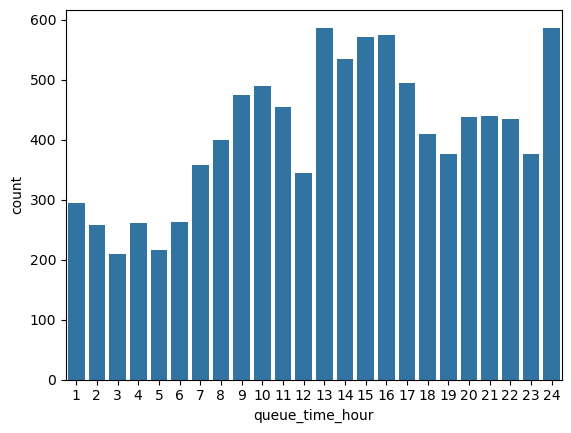

In [29]:
# time of the day for calls
base_color = sb.color_palette()[0]
time_of_day = df['queue_time_hour'].value_counts()
sb.countplot(data = df, x = 'queue_time_hour', color = base_color)

<AxesSubplot:xlabel='queue_time_hour', ylabel='count'>

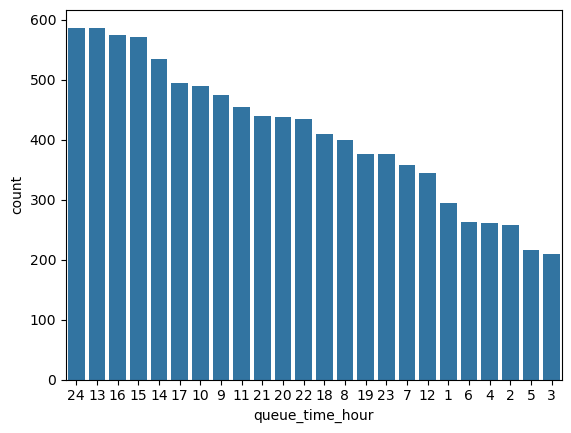

In [30]:
sb.countplot(data = df, x = 'queue_time_hour', color = base_color,
             order = time_of_day.index)

In [ ]:
"""
The majority of the calls were queued, almost evenly, at midnight and at 1pm.
In other words, somewhat into the nightlife scene and then right after lunch.
We should explore what the top call categories were for these times.
"""

<AxesSubplot:xlabel='queue_time_day', ylabel='count'>

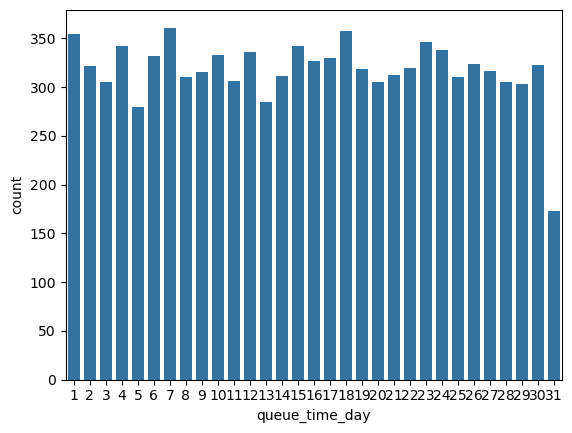

In [32]:
# day of the months for calls (note that probably remove due to inconsistency of days per month)
time_of_month = df['queue_time_day'].value_counts()
sb.countplot(data = df, x = 'queue_time_day', color = base_color)

<AxesSubplot:xlabel='queue_time_day', ylabel='count'>

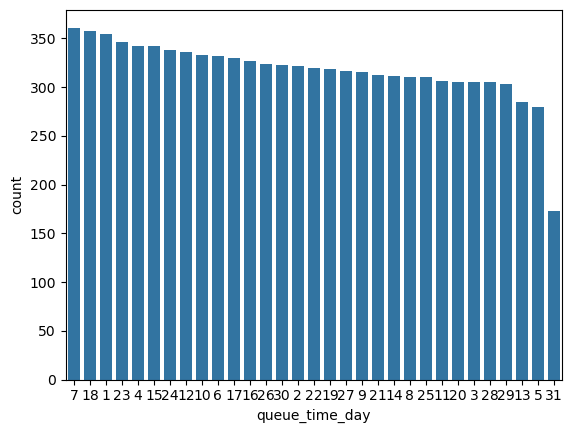

In [33]:
sb.countplot(data = df, x = 'queue_time_day', color = base_color,
             order = time_of_month.index)

In [ ]:
"""
There is some volatility, but it is difficult to draw any conclusions.
It's also logical that the 31st day has the lowest count, given that not every month has 31 days.
Something to potentially come back to would be to use the month/day/year to find days of the week.
I wonder how a Friday would compare to a Wednesday?
"""

<AxesSubplot:xlabel='queue_time_month', ylabel='count'>

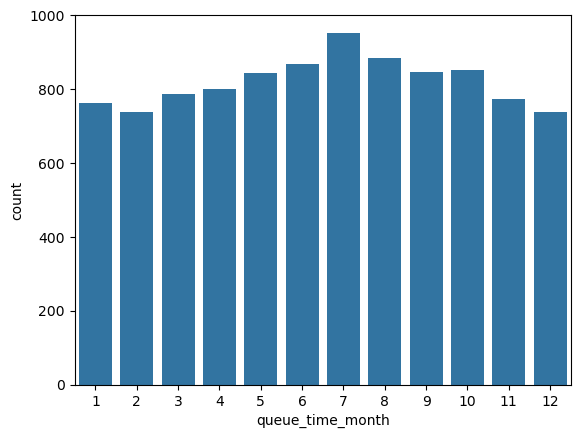

In [34]:
# month of the year
time_of_year = df['queue_time_month'].value_counts()
sb.countplot(data = df, x = 'queue_time_month', color = base_color)

<AxesSubplot:xlabel='queue_time_month', ylabel='count'>

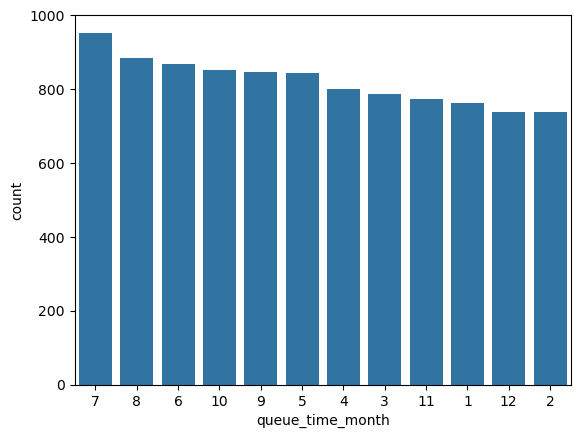

In [36]:
sb.countplot(data = df, x = 'queue_time_month', color = base_color,
             order = time_of_year.index)

In [ ]:
"""
July especially, but then followed by the other summer months of August and June.
Nicer weather, children aren't in school, possibly more tourists?
There are several potential avenues to explore.
"""

<AxesSubplot:xlabel='queue_time_year', ylabel='count'>

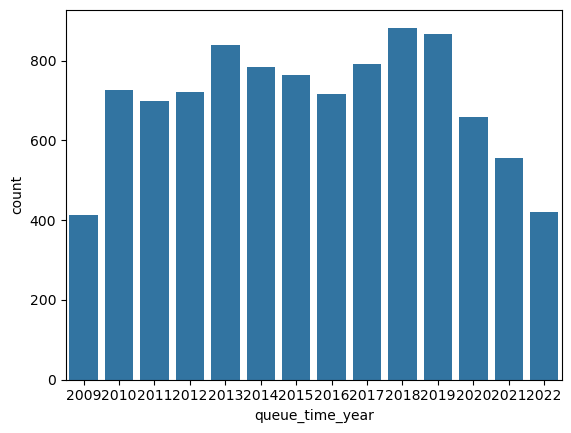

In [37]:
# call rate over the years
call_year = df['queue_time_year'].value_counts()
sb.countplot(data = df, x = 'queue_time_year', color = base_color)

<AxesSubplot:xlabel='queue_time_year', ylabel='count'>

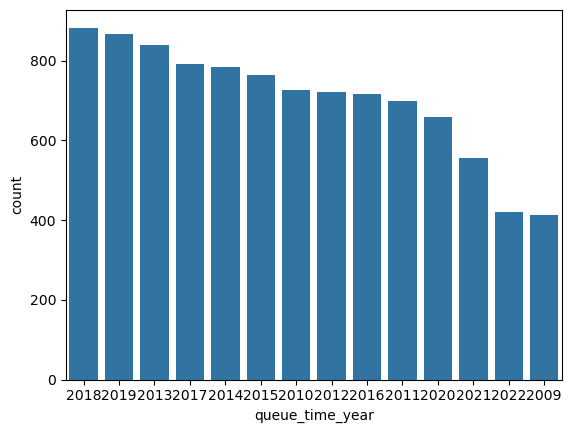

In [38]:
sb.countplot(data = df, x = 'queue_time_year', color = base_color,
             order = call_year.index)

In [ ]:
"""
Unless we were performing a historical analysis, and trying to predict what points would have been previously,
it wouldn't be logical to retain year for building the predictive model as it will either be constant or not in
the data.

We could use the dates to explore or remove possible outlier dates such as sporting events, protests, etc.

TLDR; not very useful for multiple reasons.
"""

## Question 1 Thought Process and Notes
1. Time of the day has potential to be a driver. We should explore what the top call categories were for midnight and 1pm.
2. Month of the year has potential to be a driver. However, this would be far more interesting if paired with another database, such as tourists and weather.
3. Day of the month didn't provide too much insight. However, maybe paired with month of the year, we could see a pattern given certain special days such as July 4th, New Years Eve, etc.
4. Year was somewhat arbitrary, as a predictive model is at some point going to contain a year not even in the training data. One thing to note would be explore outliers such as historical events.

Before moving on to the next question, we'll explore the top call categories for midnight and 1pm.

In [61]:
# See blog_post_functions for more information on secondary_unique
# Make a DataFrame which counts the number of times each unique call type appears for each hour
time_and_call = secondary_unique(df, 'queue_time_hour', 'Initial Call Type', 'yes')

In [42]:
time_and_call.head(10)

24  13  16  15  14  17  10  \
PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY      51  65  50  35  42  32  46   
DISTURBANCE, MISCELLANEOUS/OTHER                  35  20  21  21  20  29  15   
TRAFFIC STOP - OFFICER INITIATED ONVIEW           30  29  20  17  23  22  22   
SUSPICIOUS PERSON, VEHICLE OR INCIDENT            29  31  21  28  31  24  28   
PARKING VIOLATION (EXCEPT ABANDONED CAR)          29  27  18  29  24  23  40   
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW        27  19  15  21  19  19  16   
DIRECTED PATROL ACTIVITY                          21  21  17  19  28  12   9   
NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)  13   7  13  11   9   4   4   
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)         12  12  13  16  19  12  14   
NUISANCE - MISCHIEF                               11  10   9   5   6   7  16   

                                                  9   11  21  ...  19  23  7   \
PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY      52  36  31  ...  21  21  45   
DISTURBANCE, MISCELLANEOUS/OTHER                  21  22  25  ...  21  20  11   
TRAFFIC STOP - OFFICER INITIATED ONVIEW           20  24  48  ...   9  32  17   
SUSPICIOUS PERSON, VEHICLE OR INCIDENT            27  23  38  ...  29  33  19   
PARKING VIOLATION (EXCEPT ABANDONED CAR)          31  33  15  ...  20  13  31   
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW         4  16  19  ...   3  28   4   
DIRECTED PATROL ACTIVITY                          13   6  12  ...   9   9  17   
NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)   2   5  11  ...   7   7   1   
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)         13   9   5  ...  10   5   9   
NUISANCE - MISCHIEF                               15  13   6  ...   8   3  14   

                                                  12  1   6   4   2   5   3   
PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY      26  25  31  45  18  26  25  
DISTURBANCE, MISCELLANEOUS/OTHER                  18  27   7   8  28  14  18  
TRAFFIC STOP - OFFICER INITIATED ONVIEW           31  26  13  11  22  11  11  
SUSPICIOUS PERSON, VEHICLE OR INCIDENT            34  27  14  20  26  11  10  
PARKING VIOLATION (EXCEPT ABANDONED CAR)           6   4  15   2   3   7   1  
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW        27  17   7   9  12   4   9  
DIRECTED PATROL ACTIVITY                          12  11  19  35   3  19  13  
NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)   2   4   0   2   2   0   1  
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)          1  10   5   6   4  12   5  
NUISANCE - MISCHIEF                                2   1   7   1   0   2   1  

[10 rows x 24 columns]

In [62]:
# turn the counts into percentages by category per specific hour (percentages by column)
# See blog_post_functions for more information on counts_to_portions
time_and_call_percent = counts_to_portions(time_and_call, variant = 'col')

In [63]:
time_and_call_percent[[24, 13]].head(10)

24        13
PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY      0.086882  0.110733
DISTURBANCE, MISCELLANEOUS/OTHER                  0.059625  0.034072
TRAFFIC STOP - OFFICER INITIATED ONVIEW           0.051107  0.049404
SUSPICIOUS PERSON, VEHICLE OR INCIDENT            0.049404  0.052811
PARKING VIOLATION (EXCEPT ABANDONED CAR)          0.049404  0.045997
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW        0.045997  0.032368
DIRECTED PATROL ACTIVITY                          0.035775  0.035775
NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)  0.022147  0.011925
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)         0.020443  0.020443
NUISANCE - MISCHIEF                               0.018739  0.017036

In [64]:
time_and_call_percent[24].sort_values(ascending=False).head(10)

PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY        0.086882
DISTURBANCE, MISCELLANEOUS/OTHER                    0.059625
TRAFFIC STOP - OFFICER INITIATED ONVIEW             0.051107
SUSPICIOUS PERSON, VEHICLE OR INCIDENT              0.049404
PARKING VIOLATION (EXCEPT ABANDONED CAR)            0.049404
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW          0.045997
DIRECTED PATROL ACTIVITY                            0.035775
NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)    0.022147
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)           0.020443
NUISANCE - MISCHIEF                                 0.018739
Name: 24, dtype: float64

In [65]:
time_and_call_percent[13].sort_values(ascending=False).head(10)

PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY    0.110733
SUSPICIOUS PERSON, VEHICLE OR INCIDENT          0.052811
TRAFFIC STOP - OFFICER INITIATED ONVIEW         0.049404
PARKING VIOLATION (EXCEPT ABANDONED CAR)        0.045997
DIRECTED PATROL ACTIVITY                        0.035775
DISTURBANCE, MISCELLANEOUS/OTHER                0.034072
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW      0.032368
SHOPLIFT - THEFT                                0.030664
TRESPASS                                        0.030664
FOLLOW UP                                       0.023850
Name: 13, dtype: float64

In [69]:
# For reference, we should take a look at the top 10 overall for Initial Call Type
df['Initial Call Type'].value_counts(ascending=False).head(10) / df.shape[0]

PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY    0.086356
SUSPICIOUS PERSON, VEHICLE OR INCIDENT          0.059535
TRAFFIC STOP - OFFICER INITIATED ONVIEW         0.055369
DISTURBANCE, MISCELLANEOUS/OTHER                0.049782
PARKING VIOLATION (EXCEPT ABANDONED CAR)        0.046937
DIRECTED PATROL ACTIVITY                        0.036371
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW      0.035152
TRESPASS                                        0.024891
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)       0.022859
OFF DUTY EMPLOYMENT                             0.017474
Name: Initial Call Type, dtype: float64

In [54]:
time_and_call = secondary_unique(df, 'queue_time_hour', 'Final Call Type', 'yes')
time_and_call_percent = counts_to_portions(time_and_call, variant = 'col')
time_and_call_percent[[24, 13]].head(10)

24        13
--PREMISE CHECKS - CRIME PREVENTION              0.080068  0.091993
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON         0.080068  0.071550
--TRAFFIC - MV COLLISION INVESTIGATION           0.064736  0.052811
--DISTURBANCE - OTHER                            0.056218  0.049404
--TRAFFIC - MOVING VIOLATION                     0.056218  0.045997
--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR)  0.056218  0.051107
--THEFT - ALL OTHER                              0.035775  0.018739
--ASSIST PUBLIC - OTHER (NON-SPECIFIED)          0.035775  0.037479
--DIRECTED PATROL ACTIVITY                       0.025554  0.034072
--CRISIS COMPLAINT - GENERAL                     0.023850  0.020443

In [59]:
time_and_call_percent[24].sort_values(ascending=False).head(10)

--PREMISE CHECKS - CRIME PREVENTION                0.080068
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON           0.080068
--TRAFFIC - MV COLLISION INVESTIGATION             0.064736
--DISTURBANCE - OTHER                              0.056218
--TRAFFIC - MOVING VIOLATION                       0.056218
--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR)    0.056218
--THEFT - ALL OTHER                                0.035775
--ASSIST PUBLIC - OTHER (NON-SPECIFIED)            0.035775
--DIRECTED PATROL ACTIVITY                         0.025554
--PROWLER - TRESPASS                               0.023850
Name: 24, dtype: float64

In [60]:
time_and_call_percent[13].sort_values(ascending=False).head(10)

--PREMISE CHECKS - CRIME PREVENTION                0.091993
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON           0.071550
--TRAFFIC - MV COLLISION INVESTIGATION             0.052811
--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR)    0.051107
--DISTURBANCE - OTHER                              0.049404
--TRAFFIC - MOVING VIOLATION                       0.045997
--ASSIST PUBLIC - OTHER (NON-SPECIFIED)            0.037479
--DIRECTED PATROL ACTIVITY                         0.034072
--PROWLER - TRESPASS                               0.025554
--THEFT - SHOPLIFT                                 0.023850
Name: 13, dtype: float64

In [70]:
# For reference, we should take a look at the top 10 overall for Initial Call Type
df['Final Call Type'].value_counts(ascending=False).head(10) / df.shape[0]

--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON           0.084730
--PREMISE CHECKS - CRIME PREVENTION                0.080971
--DISTURBANCE - OTHER                              0.074164
--TRAFFIC - MOVING VIOLATION                       0.053134
--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR)    0.048461
--TRAFFIC - MV COLLISION INVESTIGATION             0.045311
--ASSIST PUBLIC - OTHER (NON-SPECIFIED)            0.041959
--DIRECTED PATROL ACTIVITY                         0.029564
--PROWLER - TRESPASS                               0.027227
--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE          0.023468
Name: Final Call Type, dtype: float64

## Potential Question 2
Do amount of calls / priority of calls change by precinct, sector or beat? Does initial call type factor into Priority?

<AxesSubplot:xlabel='Priority', ylabel='count'>

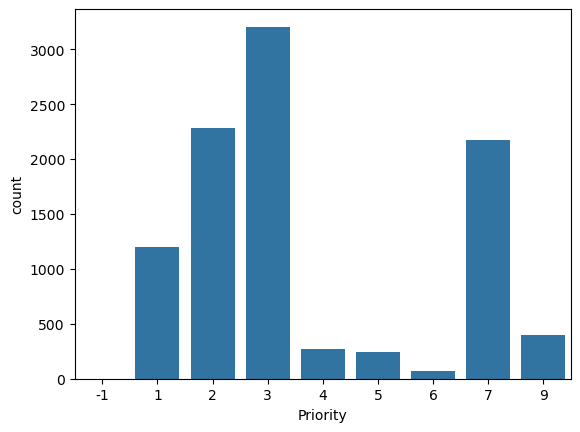

In [72]:
# Priority
univariate_indicator = df['Priority'].value_counts()
sb.countplot(data = df, x = 'Priority', color = base_color)

<AxesSubplot:xlabel='Priority', ylabel='count'>

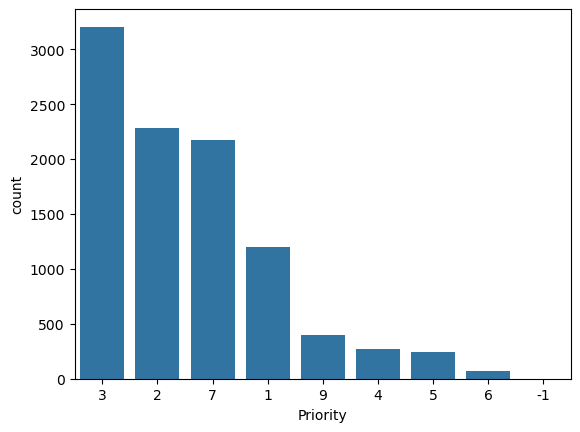

In [75]:
sb.countplot(data = df, x = 'Priority', color = base_color,
             order = univariate_indicator.index)

In [ ]:
"""
By far, the most common Priority given is a Priority 3, followed by 2 and 7.

To be fair, I'm not sure what exactly a Priorty 9 to a Priority 1 means, they could be nominal (i.e. have no order) 
"""

<AxesSubplot:xlabel='count', ylabel='Initial Call Type'>

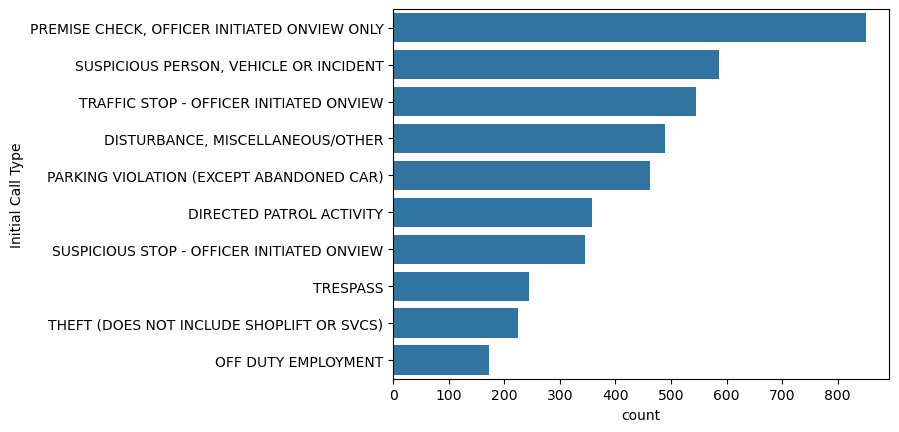

In [78]:
# Initial Call Type
univariate_indicator = df['Initial Call Type'].value_counts()
sb.countplot(data = df, y = 'Initial Call Type', color = base_color,
             order = univariate_indicator.head(10).index)

<AxesSubplot:xlabel='count', ylabel='Precinct'>

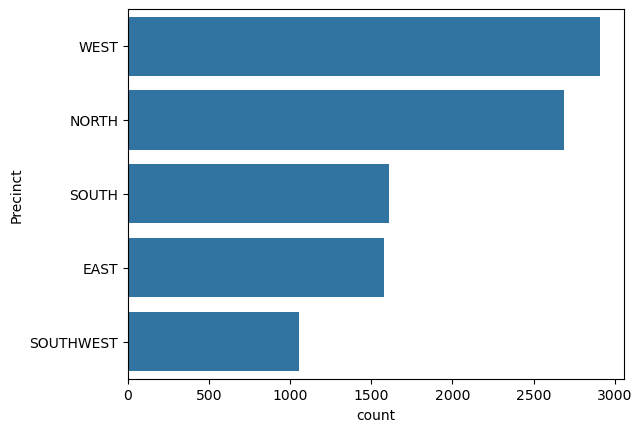

In [82]:
# Precinct - Area Breakdown Level 1
univariate_indicator = df['Precinct'].value_counts()
sb.countplot(data = df, y = 'Precinct', color = base_color,
             order = univariate_indicator.index)

<AxesSubplot:xlabel='count', ylabel='Sector'>

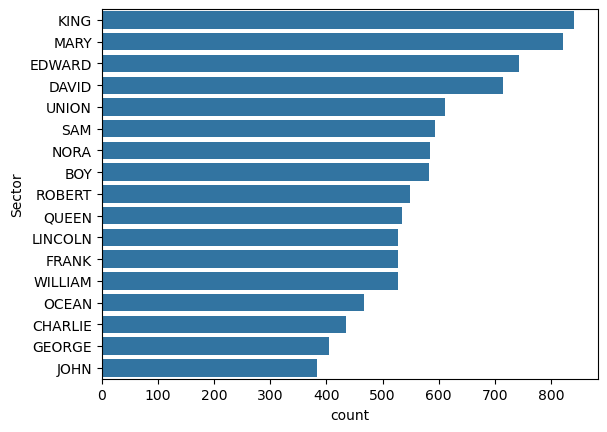

In [83]:
# Sector - Area Breakdown Level 2
univariate_indicator = df['Sector'].value_counts()
sb.countplot(data = df, y = 'Sector', color = base_color,
             order = univariate_indicator.index)

<AxesSubplot:xlabel='count', ylabel='Beat'>

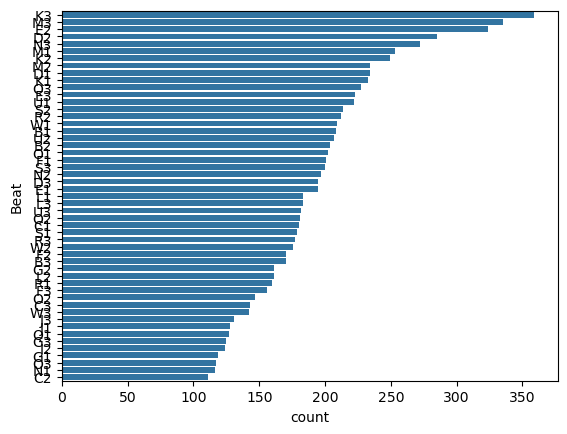

In [84]:
# Beat - Area Breakdown Level 3
univariate_indicator = df['Beat'].value_counts()
sb.countplot(data = df, y = 'Beat', color = base_color,
             order = univariate_indicator.index)

In [87]:
# Out of curiosity, it would be interesting to run the secondary_unique formula on the Area Breakdown levels.
# Each Beat should only be in a single Sector, and Each Sector should only be in a single Precinct
sector_and_beat = secondary_unique(df, 'Sector', 'Beat', 'yes')
sector_and_beat

KING  MARY  EDWARD  DAVID  UNION  SAM  NORA  BOY  ROBERT  QUEEN  LINCOLN  \
K3   359     0       0      0      0    0     0    0       0      0        0   
K2   249     0       0      0      0    0     0    0       0      0        0   
K1   233     0       0      0      0    0     0    0       0      0        0   
M3     0   335       0      0      0    0     0    0       0      0        0   
E2     0     0     324      0      0    0     0    0       0      0        0   
D2     0     0       0    285      0    0     0    0       0      0        0   
N3     0     0       0      0      0    0   272    0       0      0        0   
M1     0   253       0      0      0    0     0    0       0      0        0   
M2     0   234       0      0      0    0     0    0       0      0        0   
D1     0     0       0    234      0    0     0    0       0      0        0   
Q3     0     0       0      0      0    0     0    0       0    227        0   
E3     0     0     223      0      0    0     0    0       0      0        0   
U1     0     0       0      0    222    0     0    0       0      0        0   
S2     0     0       0      0      0  214     0    0       0      0        0   
R2     0     0       0      0      0    0     0    0     212      0        0   
W1     0     0       0      0      0    0     0    0       0      0        0   
B1     0     0       0      0      0    0     0  208       0      0        0   
U2     0     0       0      0    207    0     0    0       0      0        0   
B2     0     0       0      0      0    0     0  204       0      0        0   
O1     0     0       0      0      0    0     0    0       0      0        0   
F1     0     0       0      0      0    0     0    0       0      0        0   
S3     0     0       0      0      0  200     0    0       0      0        0   
N2     0     0       0      0      0    0   197    0       0      0        0   
D3     0     0       0    195      0    0     0    0       0      0        0   
E1     0     0     195      0      0    0     0    0       0      0        0   
L1     0     0       0      0      0    0     0    0       0      0      183   
L3     0     0       0      0      0    0     0    0       0      0      183   
U3     0     0       0      0    182    0     0    0       0      0        0   
Q2     0     0       0      0      0    0     0    0       0    181        0   
C1     0     0       0      0      0    0     0    0       0      0        0   
S1     0     0       0      0      0  179     0    0       0      0        0   
R3     0     0       0      0      0    0     0    0     177      0        0   
W2     0     0       0      0      0    0     0    0       0      0        0   
F2     0     0       0      0      0    0     0    0       0      0        0   
B3     0     0       0      0      0    0     0  170       0      0        0   
G2     0     0       0      0      0    0     0    0       0      0        0   
L2     0     0       0      0      0    0     0    0       0      0      161   
R1     0     0       0      0      0    0     0    0     160      0        0   
F3     0     0       0      0      0    0     0    0       0      0        0   
O2     0     0       0      0      0    0     0    0       0      0        0   
C3     0     0       0      0      0    0     0    0       0      0        0   
W3     0     0       0      0      0    0     0    0       0      0        0   
J3     0     0       0      0      0    0     0    0       0      0        0   
J1     0     0       0      0      0    0     0    0       0      0        0   
Q1     0     0       0      0      0    0     0    0       0    127        0   
G3     0     0       0      0      0    0     0    0       0      0        0   
J2     0     0       0      0      0    0     0    0       0      0        0   
G1     0     0       0      0      0    0     0    0       0      0        0   
O3     0     0       0      0      0    0     0    0       0      0        0   
N1  

In [88]:
precinct_and_sector = secondary_unique(df, 'Precinct', 'Sector', 'yes')
precinct_and_sector

WEST  NORTH  SOUTH  EAST  SOUTHWEST
KING      841      0      0     0          0
MARY      822      0      0     0          0
DAVID     714      0      0     0          0
QUEEN     535      0      0     0          0
EDWARD      0      0      0   742          0
UNION       0    611      0     0          0
SAM         0      0    593     0          0
NORA        0    585      0     0          0
BOY         0    582      0     0          0
ROBERT      0      0    549     0          0
LINCOLN     0    527      0     0          0
FRANK       0      0      0     0        527
WILLIAM     0      0      0     0        527
OCEAN       0      0    466     0          0
CHARLIE     0      0      0   434          0
GEORGE      0      0      0   405          0
JOHN        0    383      0     0          0

In [99]:
# Let's get into comparing Priority with other factors
# Priority and Initial Call Type
priority_and_initial = secondary_unique(df, 'Priority', 'Initial Call Type', 'yes')
priority_and_initial.head(10)

3    2   7   1   9   4   5  \
PARKING VIOLATION (EXCEPT ABANDONED CAR)        422    0   0   0   0  40   0   
SUSPICIOUS PERSON, VEHICLE OR INCIDENT          367  211   0   8   0   0   0   
DISTURBANCE, MISCELLANEOUS/OTHER                227  241   0  22   0   0   0   
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)       166   58   0   1   0   0   0   
NUISANCE - MISCHIEF                             156    2   0   0   0   0   0   
FOLLOW UP                                       155    5   0   0   0   0   0   
ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE  153    3   0   0   0   0   0   
AUTO THEFT - VEH THEFT OR THEFT & RECOVERY      143    2   0   0   0   0   0   
ALARM - COMM, SILENT/AUD BURG (INCL BANKS)      140   19   0   0   0   0   0   
BURG - RES (INCL UNOCC STRUCTURES ON PROP)      108   20   0   0   0   0   0   

                                                 6  -1  
PARKING VIOLATION (EXCEPT ABANDONED CAR)         0   0  
SUSPICIOUS PERSON, VEHICLE OR INCIDENT           0   0  
DISTURBANCE, MISCELLANEOUS/OTHER                 0   0  
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)        0   0  
NUISANCE - MISCHIEF                              0   0  
FOLLOW UP                                        0   0  
ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE   0   0  
AUTO THEFT - VEH THEFT OR THEFT & RECOVERY       0   0  
ALARM - COMM, SILENT/AUD BURG (INCL BANKS)       0   0  
BURG - RES (INCL UNOCC STRUCTURES ON PROP)       0   0

In [92]:
priority_and_initial[3].sort_values(ascending=False).head(10)

PARKING VIOLATION (EXCEPT ABANDONED CAR)          422
SUSPICIOUS PERSON, VEHICLE OR INCIDENT            367
DISTURBANCE, MISCELLANEOUS/OTHER                  227
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)         166
NUISANCE - MISCHIEF                               156
FOLLOW UP                                         155
ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE    153
AUTO THEFT - VEH THEFT OR THEFT & RECOVERY        143
ALARM - COMM, SILENT/AUD BURG (INCL BANKS)        140
BURG - RES (INCL UNOCC STRUCTURES ON PROP)        108
Name: 3, dtype: int64

In [93]:
priority_and_initial[2].sort_values(ascending=False).head(10)

DISTURBANCE, MISCELLANEOUS/OTHER                    241
TRESPASS                                            237
SUSPICIOUS PERSON, VEHICLE OR INCIDENT              211
SHOPLIFT - THEFT                                    126
NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)    120
HAZ - POTENTIAL THRT TO PHYS SAFETY (NO HAZMAT)     117
ASSIST OTHER AGENCY - ROUTINE SERVICE                77
TRAFFIC - BLOCKING ROADWAY                           72
FIGHT - VERBAL/ORAL (NO WEAPONS)                     71
DIST - DV - NO ASLT                                  71
Name: 2, dtype: int64

In [94]:
priority_and_initial[9].sort_values(ascending=False).head(10)

OFF DUTY EMPLOYMENT                                172
-ASSIGNED DUTY - DETAIL BY SUPERVISOR               40
-GAS/MAINTENANCE/WASH/GARAGE                        28
-PRISONER ESCORT - BUSY CODE                        21
-ASSIGNED DUTY - COMMUNITY,SCHOOL,SPECIAL EVENT     18
-OUT TO PRECINCT/STATION                            17
-OFF DUTY EMPLOYMENT                                16
-ASSIGNED DUTY - TRANSPORT EVIDENCE,EQUIPMENT       16
-ASSIGNED DUTY - FOOT BEAT (FROM ASSIGNED CAR)      13
-ASSIGNED DUTY - IN-SERVICE TRAINING                11
Name: 9, dtype: int64

In [95]:
priority_and_initial[1].sort_values(ascending=False).head(10)

ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)       98
DOWN - CHECK FOR PERSON DOWN                         90
SFD - ASSIST ON FIRE OR MEDIC RESPONSE               79
DIST - IP/JO - DV DIST - NO ASLT                     72
UNKNOWN - ANI/ALI - LANDLINE (INCLUDES OPEN LINE)    61
SUICIDE - IP/JO SUICIDAL PERSON AND ATTEMPTS         61
MVC - WITH INJURIES (INCLUDES HIT AND RUN)           60
FIGHT - IP - PHYSICAL (NO WEAPONS)                   57
SHOTS - IP/JO - INCLUDES HEARD/NO ASSAULT            53
UNKNOWN - COMPLAINT OF UNKNOWN NATURE                45
Name: 1, dtype: int64

In [105]:
# Priority and Initial Call Type
priority_and_precinct = secondary_unique(df, 'Priority', 'Precinct', 'yes')
priority_and_precinct

3    2    7    1    9   4   5   6  -1
NORTH      998  693  362  367   77  89  78  24   0
WEST       882  657  715  309  195  69  64  20   1
SOUTH      501  337  440  212   49  35  29   4   1
EAST       496  336  392  182   58  55  47  15   0
SOUTHWEST  328  256  265  132   22  24  22   5   0

In [101]:
# Priority and Precinct Percentage by Priority
priority_and_precinct = secondary_unique(df, 'Priority', 'Precinct', 'yes')
priority_and_precinct = counts_to_portions(priority_and_precinct, variant = 'col')
priority_and_precinct

3         2         7         1         9         4  \
NORTH      0.311388  0.304081  0.166513  0.305324  0.192020  0.327206   
WEST       0.275195  0.288284  0.328887  0.257072  0.486284  0.253676   
SOUTH      0.156318  0.147872  0.202392  0.176373  0.122195  0.128676   
EAST       0.154758  0.147433  0.180313  0.151414  0.144638  0.202206   
SOUTHWEST  0.102340  0.112330  0.121895  0.109817  0.054863  0.088235   

                  5         6   -1  
NORTH      0.325000  0.352941  0.0  
WEST       0.266667  0.294118  0.5  
SOUTH      0.120833  0.058824  0.5  
EAST       0.195833  0.220588  0.0  
SOUTHWEST  0.091667  0.073529  0.0

In [149]:
# Priority and Precinct Percentage by Precinct
priority_and_precinct = secondary_unique(df, 'Priority', 'Precinct', 'yes')
priority_and_precinct = counts_to_portions(priority_and_precinct, variant = 'row')
priority_and_precinct

3         2         7         1         9         4  \
NORTH      0.371280  0.257812  0.134673  0.136533  0.028646  0.033110   
WEST       0.302885  0.225618  0.245536  0.106113  0.066964  0.023695   
SOUTH      0.311567  0.209577  0.273632  0.131841  0.030473  0.021766   
EAST       0.313725  0.212524  0.247944  0.115117  0.036686  0.034788   
SOUTHWEST  0.311195  0.242884  0.251423  0.125237  0.020873  0.022770   

                  5         6        -1  
NORTH      0.029018  0.008929  0.000000  
WEST       0.021978  0.006868  0.000343  
SOUTH      0.018035  0.002488  0.000622  
EAST       0.029728  0.009488  0.000000  
SOUTHWEST  0.020873  0.004744  0.000000

In [156]:
priority_and_precinct.describe()

3         2         7         1         9         4         5  \
count  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000   
mean   0.322130  0.229683  0.230642  0.122968  0.036728  0.027226  0.023926   
std    0.027784  0.020498  0.054798  0.012386  0.017819  0.006204  0.005182   
min    0.302885  0.209577  0.134673  0.106113  0.020873  0.021766  0.018035   
25%    0.311195  0.212524  0.245536  0.115117  0.028646  0.022770  0.020873   
50%    0.311567  0.225618  0.247944  0.125237  0.030473  0.023695  0.021978   
75%    0.313725  0.242884  0.251423  0.131841  0.036686  0.033110  0.029018   
max    0.371280  0.257812  0.273632  0.136533  0.066964  0.034788  0.029728   

              6        -1  
count  5.000000  5.000000  
mean   0.006503  0.000193  
std    0.002922  0.000282  
min    0.002488  0.000000  
25%    0.004744  0.000000  
50%    0.006868  0.000000  
75%    0.008929  0.000343  
max    0.009488  0.000622

In [158]:
cv = priority_and_precinct.std() / priority_and_precinct.mean()
cv

 3    0.086252
 2    0.089247
 7    0.237590
 1    0.100723
 9    0.485159
 4    0.227856
 5    0.216582
 6    0.449261
-1    1.461196
dtype: float64

In [106]:
# Priority and Precinct Percentage by Total
priority_and_precinct = secondary_unique(df, 'Priority', 'Precinct', 'yes')
priority_and_precinct = counts_to_portions(priority_and_precinct, variant = 'total')
priority_and_precinct

3         2         7         1         9         4  \
NORTH      0.101392  0.070405  0.036777  0.037285  0.007823  0.009042   
WEST       0.089607  0.066748  0.072640  0.031393  0.019811  0.007010   
SOUTH      0.050899  0.034238  0.044702  0.021538  0.004978  0.003556   
EAST       0.050391  0.034136  0.039825  0.018490  0.005893  0.005588   
SOUTHWEST  0.033323  0.026008  0.026923  0.013411  0.002235  0.002438   

                  5         6        -1  
NORTH      0.007924  0.002438  0.000000  
WEST       0.006502  0.002032  0.000102  
SOUTH      0.002946  0.000406  0.000102  
EAST       0.004775  0.001524  0.000000  
SOUTHWEST  0.002235  0.000508  0.000000

In [97]:
priority_and_sector = secondary_unique(df, 'Priority', 'Sector', 'yes')
priority_and_sector

3    2    7    1   9   4   5   6  -1
BOY      239  142   74   64   9  19  30   5   0
KING     227  192  228  102  64  13  12   2   1
QUEEN    219  105   89   61  13  22  19   7   0
DAVID    219  150  148   71  75  24  21   6   0
MARY     217  210  250   75  43  10  12   5   0
UNION    216  150   95   90  14  29  11   6   0
EDWARD   209  163  204   89  29  23  18   7   0
NORA     199  144   88   72  45  19  13   5   0
LINCOLN  198  146   72   82   3  10  10   6   0
ROBERT   191  118  126   81   4  12  15   1   1
SAM      176  132  169   82  18   7   8   1   0
FRANK    176  127  123   71  10   9  10   1   0
CHARLIE  160   81   93   48  16  17  14   5   0
WILLIAM  152  129  142   61  12  15  12   4   0
JOHN     146  111   33   59   6  12  14   2   0
OCEAN    134   87  145   49  27  16   6   2   0
GEORGE   127   92   95   45  13  15  15   3   0

([<matplotlib.axis.XTick at 0x20d04837c10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

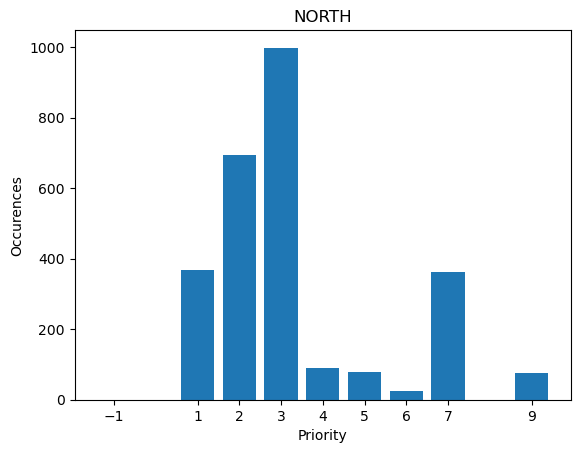

In [132]:
# Can we gather anything visually?
priority_and_precinct = secondary_unique(df, 'Priority', 'Precinct', 'yes')
plt.bar(priority_and_precinct.columns, priority_and_precinct.loc[priority_and_precinct.index[0]])
plt.title(priority_and_precinct.index[0])
plt.xlabel('Priority')
plt.ylabel('Occurences')
plt.xticks(priority_and_precinct.columns)

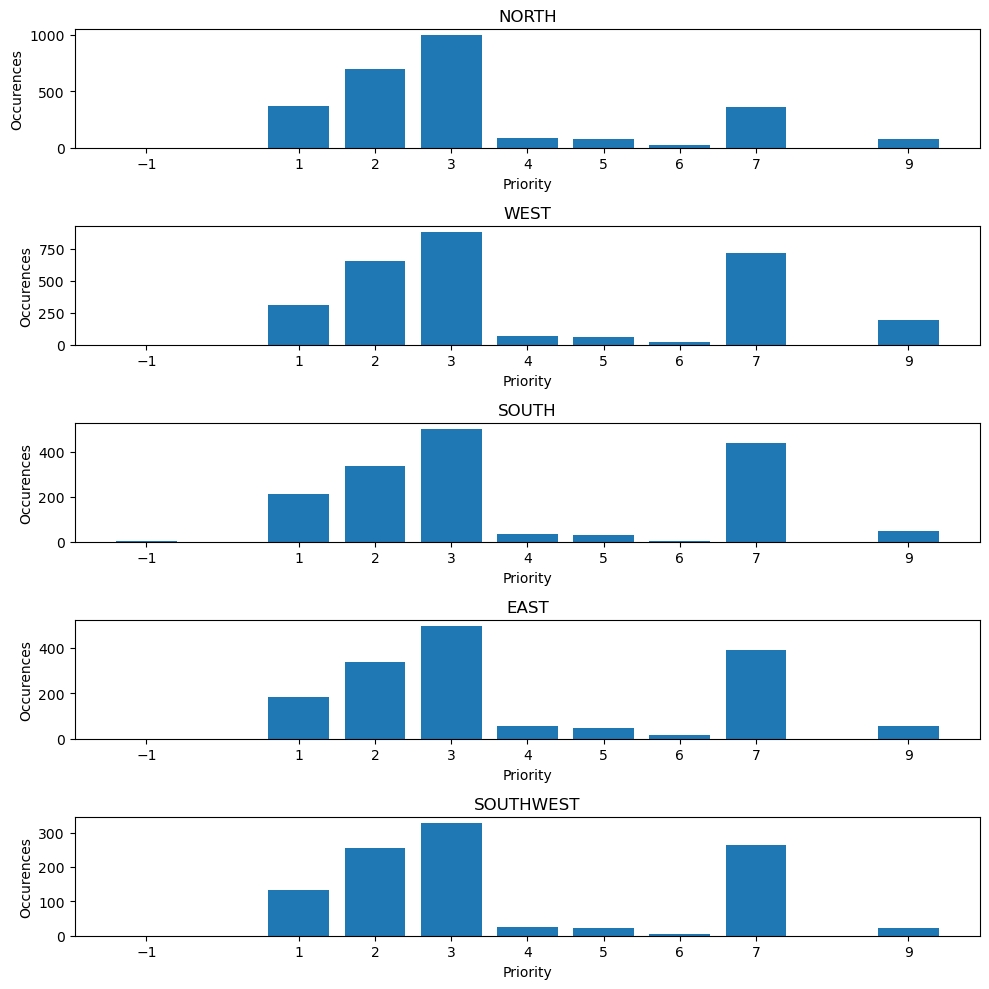

In [135]:
precincts = priority_and_precinct.index
plt.figure(figsize=(10,10))
for count, precinct in enumerate(precincts):
    plt.subplot(5, 1, count+1)
    plt.bar(priority_and_precinct.columns, priority_and_precinct.loc[precinct])
    plt.title(precinct)
    plt.xlabel('Priority')
    plt.ylabel('Occurences')
    plt.xticks(priority_and_precinct.columns)
plt.tight_layout()

In [ ]:
"""
Pretty interesting pattern. Although the total counts on the y-scale change, there does seem to be consistent proportions.
"""

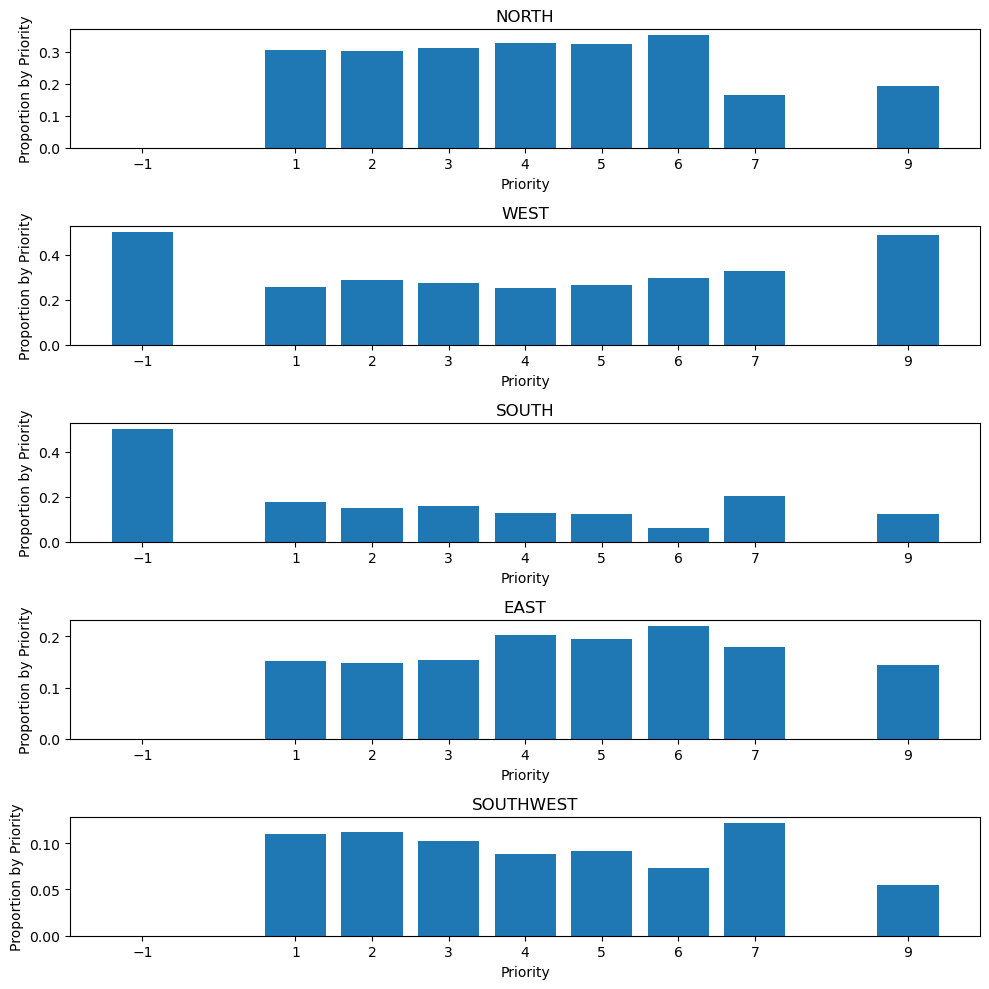

In [147]:
# Proportions by Column (i.e. Priority)
priority_and_precinct = secondary_unique(df, 'Priority', 'Precinct', 'yes')
priority_and_precinct = counts_to_portions(priority_and_precinct, variant = 'col')

precincts = priority_and_precinct.index
plt.figure(figsize=(10,10))
for count, precinct in enumerate(precincts):
    plt.subplot(5, 1, count+1)
    plt.bar(priority_and_precinct.columns, priority_and_precinct.loc[precinct])
    plt.title(precinct)
    plt.xlabel('Priority')
    plt.ylabel('Proportion by Priority')
    plt.xticks(priority_and_precinct.columns)
plt.tight_layout()

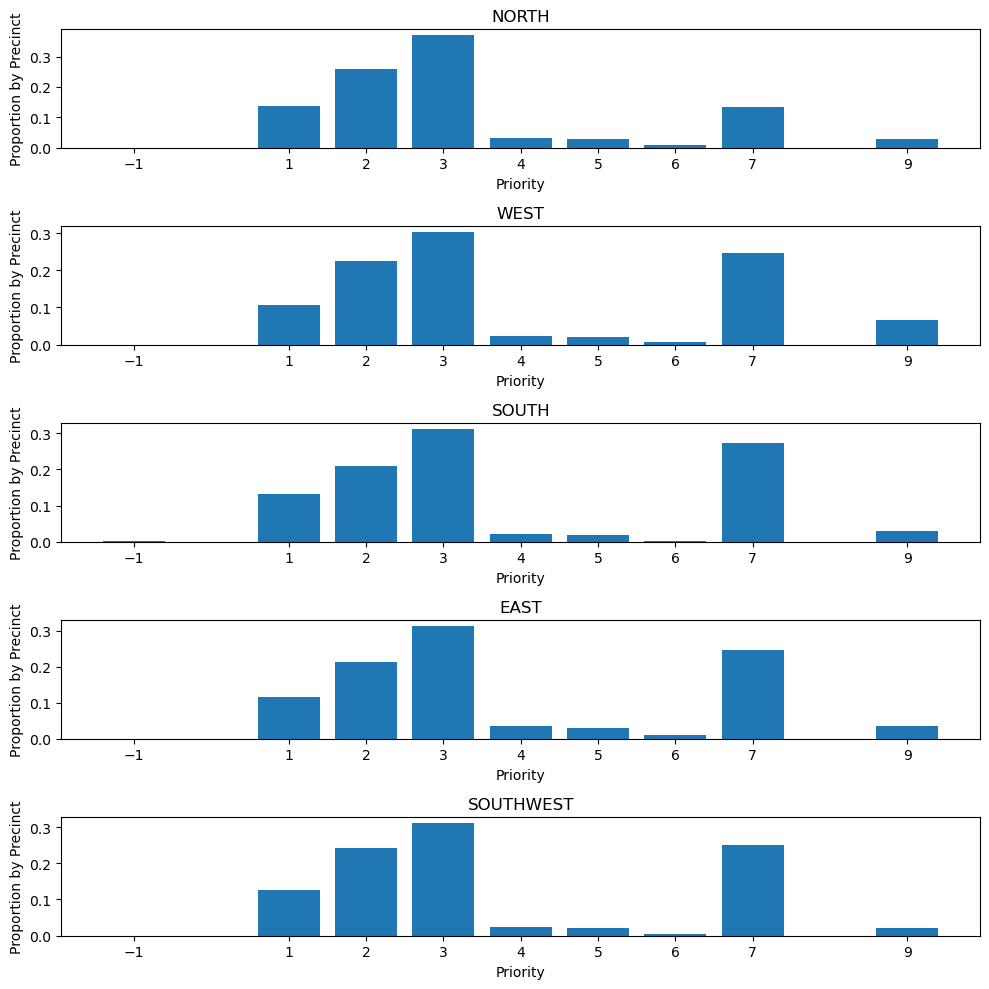

In [146]:
# Proportions by Row (i.e. Precinct (index))
# Proportion of each Priority given by Precinct
priority_and_precinct = secondary_unique(df, 'Priority', 'Precinct', 'yes')
priority_and_precinct = counts_to_portions(priority_and_precinct, variant = 'row')

precincts = priority_and_precinct.index
plt.figure(figsize=(10,10))
for count, precinct in enumerate(precincts):
    plt.subplot(5, 1, count+1)
    plt.bar(priority_and_precinct.columns, priority_and_precinct.loc[precinct])
    plt.title(precinct)
    plt.xlabel('Priority')
    plt.ylabel('Proportion by Precinct')
    plt.xticks(priority_and_precinct.columns)
plt.tight_layout()

# WOW!

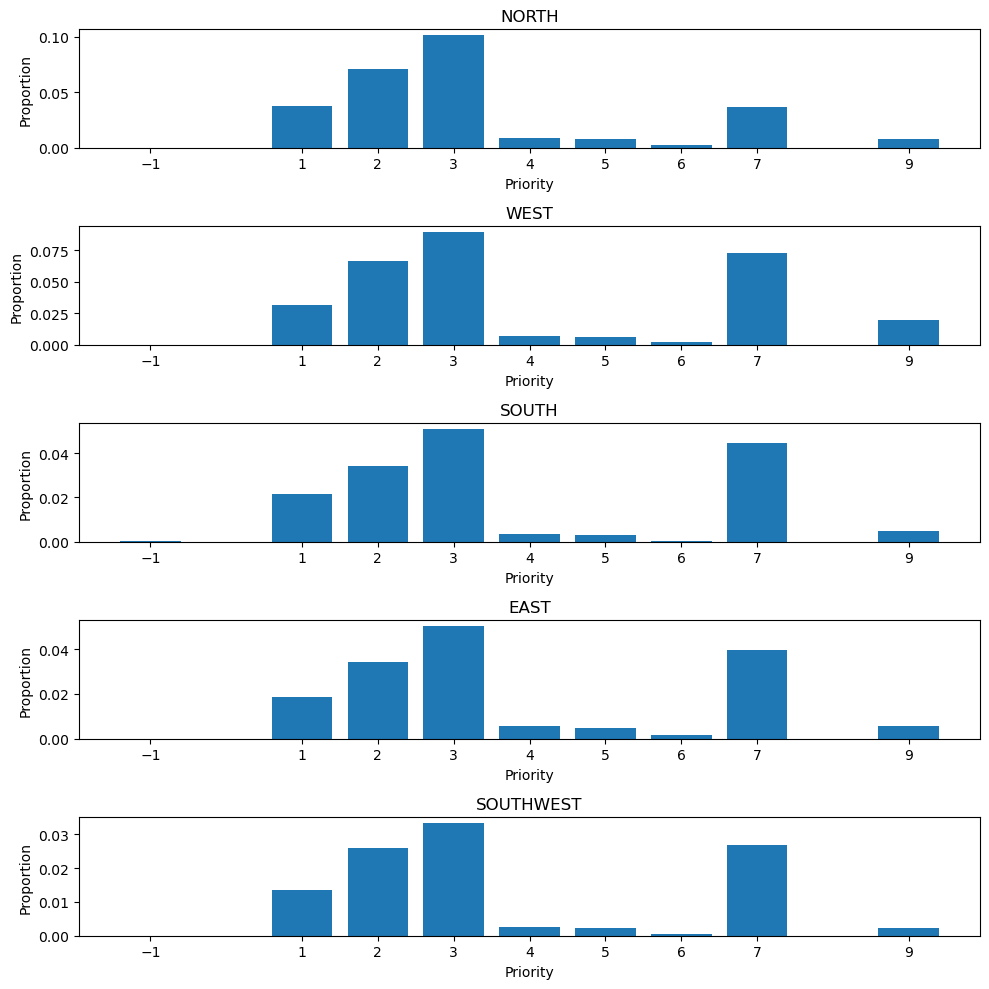

In [145]:
# Proportions by Total
priority_and_precinct = secondary_unique(df, 'Priority', 'Precinct', 'yes')
priority_and_precinct = counts_to_portions(priority_and_precinct, variant = 'total')

precincts = priority_and_precinct.index
plt.figure(figsize=(10,10))
for count, precinct in enumerate(precincts):
    plt.subplot(5, 1, count+1)
    plt.bar(priority_and_precinct.columns, priority_and_precinct.loc[precinct])
    plt.title(precinct)
    plt.xlabel('Priority')
    plt.ylabel('Proportion')
    plt.xticks(priority_and_precinct.columns)
plt.tight_layout()

## Question 2 Thought Process and Notes
1. One of the biggest takeaways was that there was a proportional pattern of Priority by Precinct. When investigating priority counts by precinct, there was a similar proportion of each priority for each Precinct.

2. It's unsure if -1 is a system error or an outlier. It only appears in 2 counties, and very infrequently at that.

3. Overall, 3 was the most common Priority, followed by 2 then 7, which were both close to each other.

4. West had the majority of the calls, and North was a close second.

5. We looked at some call information, but the relationship between Priority and Precinct was phenomenal.

## Creating the Predictive Model
We'll see if we can create a model that can accurately predict what the CAD program would assign for Priority. 

In [4]:
# Let's start with a clean DataFrame, and perform the basic cleaning we did at the beginning.
df = pd.read_csv('Call_Data_Subset.csv')

# remove the nulls
df.dropna(axis = 0, inplace = True)

# remove the blanks '-'
df.drop(df[df['Event Clearance Description'] == '-'].index, inplace = True)

# remove unnamed, cad event number
df = df.drop(['Unnamed: 0', 'CAD Event Number'], axis=1)

In [5]:
"""
Logically, we should remove some of the columns. Namely, anything arbitrary or future-tense. By future-tense, think about
time of arrival and final event descriptions.

Time Related:
- As already stated, we'll completely remove Arrived Time
- For queue time, as stated earlier, it wouldn't make sense to have year data
- For queue time, minutes and seconds are arbitrary and can be removed

Future-Tense:
- We'll also remove Event Clearance Description and Final Call Type, as those wouldn't be available until after the fact

Something else to think about is that we could remove Precinct and Sector, and just leave Beat.
Each Beat is only in a single Sector, and each Sector only in a single Precinct. Due ot that relationship, it could be
argued to remove the top 2 layers, but we will leave them in for this go around.
"""

# let's deal with the time
df = df.drop('Arrived Time', axis=1)
df = df.rename(columns={'Original Time Queued': 'queue_time'})
df = date_to_col(df, 'queue_time')
remove_dates = ['queue_time_year', 'queue_time_minute', 'queue_time_second']
df = df.drop(remove_dates, axis=1)

# we'll also remove the descriptions associated with an after call
remove_description = ['Event Clearance Description', 'Final Call Type']
df = df.drop(remove_description, axis=1)

In [6]:
# reset index
df = df.reset_index()
df.drop('index', axis=1, inplace = True)

In [7]:
# Categorical Variables

# OneHotEncoder encodes the categorical variables
from sklearn.preprocessing import OneHotEncoder

# create instance
encoder = OneHotEncoder(handle_unknown = 'ignore')

# perform on categorical columns
cat_df = df.select_dtypes(include = ['object'])

# encoding time!
df_encoder = pd.DataFrame(encoder.fit_transform(df[cat_df.columns]).toarray())
df_encoder.columns = encoder.get_feature_names_out()

df_final = df.join(df_encoder)
df_final = df_final.drop(cat_df.columns, axis=1)

In [8]:
# Set up the data to have a model ran on it

# separate response column
X = df_final.drop('Priority',axis = 1)
y = df_final['Priority']

# separate data into test and training sets
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [9]:
# Instantiate Model: Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# Evaluating the Model Performance
train_score = r2_score(y_train, y_pred_train)
test_score = r2_score(y_test, y_pred_test)
print(f'The r2 score is on the train set is {train_score}.')
print(f'The r2 score is on the test set is {test_score}.')

The r2 score is on the train set is 0.9999863177710191.
The r2 score is on the test set is 0.9634533986188931.


In [10]:
# Not bad! Say we were given a singular random datapoint to predict the Priority for. We'll just use the first datapoint in df.
# See blog_post_functions for more information on expand_categories
df.iloc[0]

Call Type                      ONVIEW
Priority                            4
Initial Call Type    REQUEST TO WATCH
Precinct                        SOUTH
Sector                          OCEAN
Beat                               O3
queue_time_month                    3
queue_time_day                     27
queue_time_hour                     5
Name: 0, dtype: object

In [11]:
full_input = expand_categories(df, df_encoder, 'Priority', list(df.iloc[0]))
single_predict = regressor.predict(np.array([full_input]))
print(f'The model predicts this will be given a Priority of {single_predict[0]}.')

The model predicts this will be given a Priority of 4.0.


C:\Users\carlj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


## Predictive Model: Decision Tree Regression Review
To be completely clear, this could be argued to require a classification model as the priorites could be argued to be categorical. Regression models predict values based on a continuous basis, which why the prediction above for the single prediction was given as a float value.

Despite that, the model seems to be pretty accurate, with an r2 score of about 0.96 on the test set.

Any input on this line of thought would be much appreciated!

## Predcitive Model: Classification Attempts
Let's try a few classification models, namely:
1. Decision Tree Classification
2. Support Vector Machine (SVM)
3. Kernel SVM
4. Logistic Regression

C:\Users\carlj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[  0   0   0   1   0   0   0   0   0]
 [  0 307  31  30   0   0   1   0   0]
 [  0  19 497 155   0   1   0   0   1]
 [  0  19 164 747  18   2   1   0   1]
 [  1   0   0  14  61   0   0   0   0]
 [  0   0   2   7   0  62   0   0   0]
 [  0   0   0   0   0   0  26   0   0]
 [  0   0   1   1   0   0   0 655   0]
 [  0   1   0   2   0   0   0   0 125]]
Overall Accuracy Score: 0.839823907890281


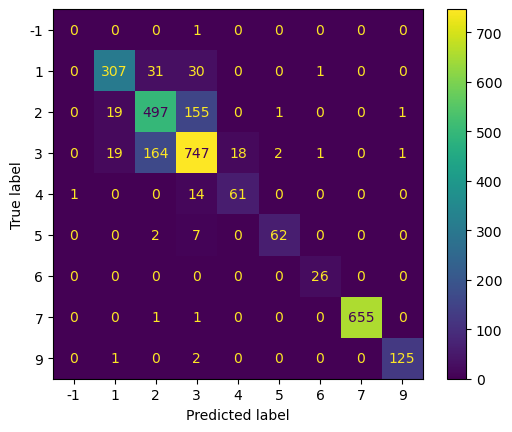

In [19]:
# 1. Decision Tree Classification
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Making the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
plot_confusion_matrix(classifier, X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Overall Accuracy Score:', accuracy_score(y_test, y_pred))

In [20]:
# Here's our single prediction
single_predict = classifier.predict(np.array([full_input]))
print(f'The model predicts this will be given a Priority of {single_predict[0]}.')

The model predicts this will be given a Priority of 3.


C:\Users\carlj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[  0   0   0   1   0   0   0   0   0]
 [  0 333  22  14   0   0   0   0   0]
 [  0   3 578  92   0   0   0   0   0]
 [  0   3 148 797   2   1   1   0   0]
 [  0   0   0  12  64   0   0   0   0]
 [  0   0   4   5   0  62   0   0   0]
 [  0   0   0   0   0   0  26   0   0]
 [  0   0   0   1   0   0   0 656   0]
 [  0   0   0   0   0   0   0   0 128]]
Overall Accuracy Score: 0.8953606501862512


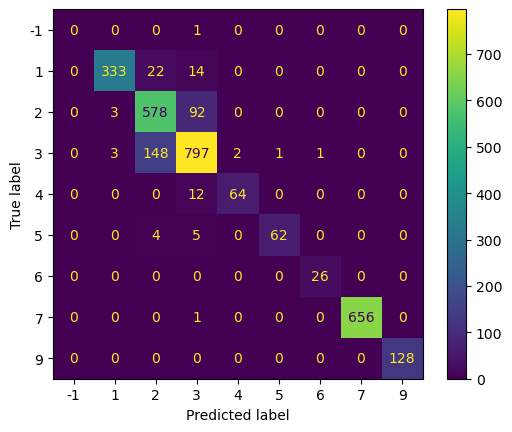

In [23]:
# 2. Support Vector Machine (SVM)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Making the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
plot_confusion_matrix(classifier, X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Overall Accuracy Score:', accuracy_score(y_test, y_pred))

In [24]:
# Here's our single prediction
single_predict = classifier.predict(np.array([full_input]))
print(f'The model predicts this will be given a Priority of {single_predict[0]}.')

The model predicts this will be given a Priority of 3.


C:\Users\carlj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[  0   0   1   0   0   0   0   0   0]
 [  0 336  20  12   0   0   0   1   0]
 [  0   0 573 100   0   0   0   0   0]
 [  0   0 132 816   1   2   1   0   0]
 [  0   2   0  12  62   0   0   0   0]
 [  0   0   2   4   0  65   0   0   0]
 [  0   0   0   0   0   0  26   0   0]
 [  0   0   0   1   0   0   0 656   0]
 [  0   0   0   0   0   0   0   0 128]]
Overall Accuracy Score: 0.9014561462919065


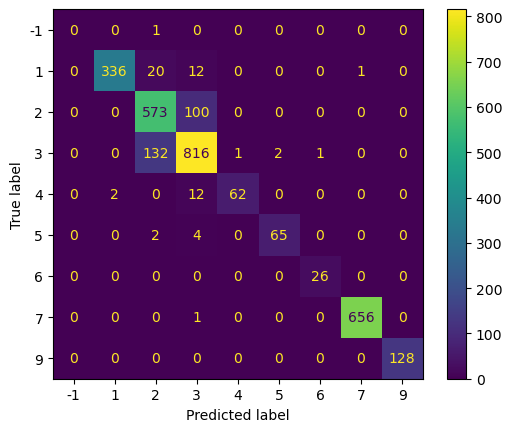

In [21]:
# 3. Kernel SVM
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Making the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
plot_confusion_matrix(classifier, X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Overall Accuracy Score:', accuracy_score(y_test, y_pred))

In [22]:
# Here's our single prediction
single_predict = classifier.predict(np.array([full_input]))
print(f'The model predicts this will be given a Priority of {single_predict[0]}.')

The model predicts this will be given a Priority of 2.


C:\Users\carlj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\carlj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[  0   0   0   1   0   0   0   0   0]
 [  0 333  25  11   0   0   0   0   0]
 [  0   3 561 109   0   0   0   0   0]
 [  0   1 125 820   3   2   1   0   0]
 [  0   0   0  12  64   0   0   0   0]
 [  0   0   2   5   0  64   0   0   0]
 [  0   0   0   0   0   0  26   0   0]
 [  0   0   0   1   0   0   0 656   0]
 [  0   0   0   0   0   0   0   0 128]]
Overall Accuracy Score: 0.8980697595665424


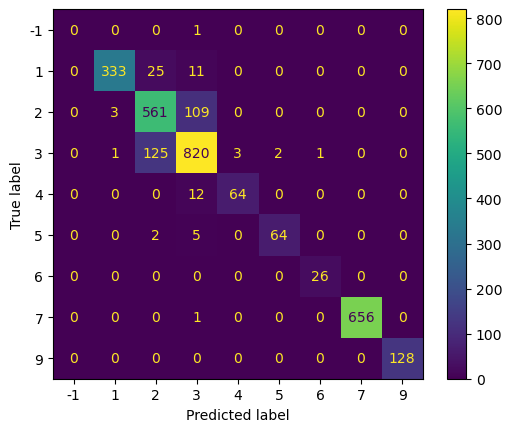

In [25]:
# 4. Logistic Regression
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Making the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
plot_confusion_matrix(classifier, X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Overall Accuracy Score:', accuracy_score(y_test, y_pred))

In [26]:
# Here's our single prediction
single_predict = classifier.predict(np.array([full_input]))
print(f'The model predicts this will be given a Priority of {single_predict[0]}.')

The model predicts this will be given a Priority of 5.


## Predictive Model: Classification Attempts Review
The models used had accuracy scores ranging from about 0.83 to 0.90, and none of them correctly predicted the single datapoint plugged in.

The heatmaps were very telling. If we look at the most accurate model tested, Kernel SVM, the main issues were predicting 2s and 3s. This is an issue because those were among the most common values to be assigned.

If we were to return to this problem and switch our response variable from Priority to a categorical value like Beat or Sector, how then would these classification models would fare?